In [101]:
# 17/05/2020:
#  i_cuar2: [12, 33, 49]
#  min_: [11.893157391973078, array([8.0e-07, 1.0e-07, 1.5e-07, 5.0e-07]), 0.3333333333333333, 0.125, 20.0, 0.01, 0.6]

# 23/05/2020
#  [12, 33, 49]
#  [14.200901560529505, array([8.0e-07, 1.0e-07, 1.5e-07, 6.0e-07]), 0.3333333333333333, 0.125, 20.0, 0.1, 0.7000000000000001]

In [102]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd
import datetime

import sys
sys.path.insert(1, '../src/')

from SEIR_exams_measures import *


In [103]:
minsal = True
if minsal:
    df = pd.read_csv ("../data/COVID_Chile_Regiones.csv")
    df = df.dropna(subset = ["Region"])
    df["Fecha_dt"] = pd.to_datetime (df["Fecha"])
    df["Fecha_dt"][df["Fecha_dt"] >= '2020-03-18'] -=  pd.Timedelta(hours=12)

    df = df[(df["Region"] == "Ñuble") & (df["Contagiados"] > 0)]
    i_data = df["Contagiados"].values
    df = df[(df["Region"] == "Ñuble") & (df["Contagiados"] > 50)]
else:
    df = pd.read_excel("../data/Ñuble.xls")
    df["Fecha_dt"] = pd.to_datetime (df["Fecha"])
    i_data = df["Contagiados"].values
    df = df[df.Contagiados > 50]

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [104]:
df = df.reset_index(drop=True)

In [105]:
df

,Region,Contagiados,Muertes,Recuperados,Infectados_Actuales,Fecha,Total_Contagiados,Fecha_dt
0,Ñuble,58,0,0,58,3/21/2020,NaN,2020-03-20 12:00:00
1,Ñuble,64,0,0,64,3/22/2020,NaN,2020-03-21 12:00:00
2,Ñuble,81,0,0,81,3/23/2020,NaN,2020-03-22 12:00:00
3,Ñuble,105,0,0,105,3/24/2020,NaN,2020-03-23 12:00:00
4,Ñuble,111,0,0,111,3/25/2020,NaN,2020-03-24 12:00:00
5,Ñuble,114,0,1,113,3/26/2020,NaN,2020-03-25 12:00:00
6,Ñuble,144,0,2,142,3/27/2020,NaN,2020-03-26 12:00:00
7,Ñuble,172,0,4,168,3/28/2020,NaN,2020-03-27 12:00:00
8,Ñuble,197,0,4,193,3/29/2020,NaN,2020-03-28 12:00:00
9,Ñuble,229,0,12,217,3/30/2020,NaN,2020-03-29 12:00:00


In [106]:
i_cuar = 10
i_cuar = 14

print (df.Fecha.iloc[i_cuar])

i_cuar2 = [df.index[df.Fecha == "3/30/2020"][0]+3, 
          df.index[df.Fecha == "4/23/2020"][0],
          49]
i_cuar2 = [12, 33, 49]

print (i_cuar2)
print (df.Fecha.iloc[i_cuar2])
print (df.Fecha.iloc[0])
t_data = np.arange(len(df.Infectados_Actuales))
C_real = df.Contagiados.values
I_real = df.Infectados_Actuales.values
R_real = df.Recuperados.values + df.Muertes.values



4/4/2020
[12, 33, 49]
12     4/2/2020
33    4/23/2020
49     5/9/2020
Name: Fecha, dtype: object
3/21/2020


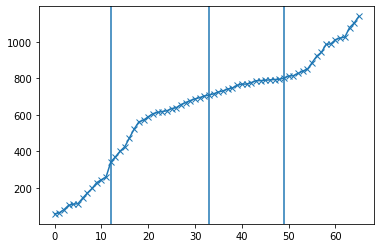

In [107]:
plt.plot(t_data, C_real, marker = "x")
for i in i_cuar2:
    plt.axvline(i)

In [108]:
pop = 511551

# Ajuste a primeros días
r0 =  19 
e0 =  22 
i0 =  31

s0 = pop - i0 - r0 - e0
c0 = C_real[0]


In [73]:
#[8.486029477192394, array([7.e-07, 1.e-14]), 0.5, 0.125, 50.0, 0.1, 0.4] 2.0 8.0
#[12.020757851191542, array([8.e-07, 1.e-07, 5.e-07]), 
# 0.5, 0.16666666666666666, 40.0, 0.03162277660168379, 0.30000000000000004]
#  min: RMSE =  12.953268281789375 ; b, s, g =  [array([8.e-07, 1.e-07, 3.e-07]), 0.3333333333333333, 0.125] ; a_d, k, a =  [60.0, 0.01, 0.5] ; ( 3.0 ,  8.0 )

trans_coeffs = []
trans_coeffs.append(np.array([8e-7]))
trans_coeffs.append(np.array([1e-7]))
#trans_coeffs.append(np.array([3e-7]))
trans_coeffs.append(np.array([1e-7, 1.5e-7, 2e-7, 2.5e-7]))
trans_coeffs.append(np.array([4e-7, 5e-7, 6e-7, 7e-7, 8e-7]))
#trans_coeffs.append(np.array([1e-7, 1.6e-7, 1.7e-7, 2e-7, 3e-7, 4e-7, 5e-7, 6e-7]))
print (trans_coeffs)

[array([8.e-07]), array([1.e-07]), array([1.0e-07, 1.5e-07, 2.0e-07, 2.5e-07]), array([4.e-07, 5.e-07, 6.e-07, 7.e-07, 8.e-07])]


4.895477023965976e-07
0.6871168953272974 
0.05555556343557843 
56.08000441355646 
0.09999472332437251 
0.3856258452621279

In [74]:
min_ = GridSearchSEIR_exams_measures (t_data, s0, e0, i0, r0, c0, c0, C_real, i_dates_betas = i_cuar2,
                                      transmission_coeffs = trans_coeffs, # 1 / day person                                                              
                                      latency_time = np.arange(1., 7., 1.), # days                                                                                                               
                                      infectious_time = np.arange(6., 18, 2.), # days                                                                                                            
                                      ks = 10**np.linspace(-2, 0, 5),
                                      a_dates = np.linspace (20, 80, 4),
                                      a_s = np.linspace(0.1, .9, 9), backward = True)


{'b0': array([8.e-07]), 'b1': array([1.e-07]), 'b2': array([1.0e-07, 1.5e-07, 2.0e-07, 2.5e-07]), 'b3': array([4.e-07, 5.e-07, 6.e-07, 7.e-07, 8.e-07])}
betas =  [8.e-07 1.e-07 1.e-07 4.e-07] 25.068513870239258
  min: RMSE =  22.09866059274771 ; b, s, g =  [array([8.e-07, 1.e-07, 1.e-07, 4.e-07]), 0.3333333333333333, 0.1] ; a_d, k, a =  [80.0, 0.01, 0.1] ; ( 3.0 ,  10.0 )
betas =  [8.e-07 1.e-07 1.e-07 5.e-07] 20.337562322616577
  min: RMSE =  22.09866059274771 ; b, s, g =  [array([8.e-07, 1.e-07, 1.e-07, 4.e-07]), 0.3333333333333333, 0.1] ; a_d, k, a =  [80.0, 0.01, 0.1] ; ( 3.0 ,  10.0 )
betas =  [8.e-07 1.e-07 1.e-07 6.e-07] 20.422317028045654
  min: RMSE =  18.334747556128175 ; b, s, g =  [array([8.e-07, 1.e-07, 1.e-07, 6.e-07]), 0.5, 0.125] ; a_d, k, a =  [60.0, 0.03162277660168379, 0.1] ; ( 2.0 ,  8.0 )
betas =  [8.e-07 1.e-07 1.e-07 7.e-07] 20.523410081863403
  min: RMSE =  18.334747556128175 ; b, s, g =  [array([8.e-07, 1.e-07, 1.e-07, 6.e-07]), 0.5, 0.125] ; a_d, k, a =  [60.0

In [126]:
fecha_proy = "5/17/2020"
i_cuar2 =  [12, 33, 49]
min_ = [11.893157391973078, np.array([8.0e-07, 1.0e-07, 1.5e-07, 5.0e-07]), 0.3333333333333333, 0.125, 20.0, 0.01, 0.6]

#fecha_proy = "5/23/2020"
#i_cuar2 = [12, 33, 49]
#min_ = [14.200901560529505, np.array([8.0e-07, 1.0e-07, 1.5e-07, 6.0e-07]), 0.3333333333333333, 0.125, 20.0, 0.1, 0.7000000000000001]

In [127]:
RMSE, betas_g, sigma_g, gamma_g, a_date_g, k_g, a_g = min_
print (min_, 1./sigma_g, 1/gamma_g)
i_cuar3 = i_cuar2
# [12.020757851191542, array([8.e-07, 1.e-07, 5.e-07]), 0.5, 0.16666666666666666, 40.0, 0.03162277660168379, 0.3]
#[8.486029477192394, array([7.e-07, 1.e-14]), 0.5, 0.125, 50.0, 0.1, 0.4] 2.0 8.0
#betas_g, sigma_g, gamma_g, a_date_g, k_g, a_g = np.array([7.e-07, 1.e-14, 7.e-07]), 0.5, 0.125, 50.0, 0.1, 0.4
#i_cuar3 = i_cuar2[:2]

[11.893157391973078, array([8.0e-07, 1.0e-07, 1.5e-07, 5.0e-07]), 0.3333333333333333, 0.125, 20.0, 0.01, 0.6] 3.0 8.0


In [128]:
ts = np.arange (0, 100, 1)
i_ini = len(i_data) - len(I_real)
x_plot_data = np.array([df["Fecha_dt"].iloc[0] + datetime.timedelta(days=i) for i in t_data.astype(float)])

x_plot_proy = np.array([df["Fecha_dt"].iloc[0] + datetime.timedelta(days=i) for i in np.arange(len(ts), dtype = float)])

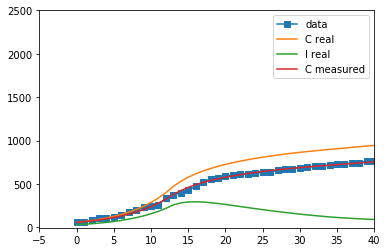

In [129]:

S_c_g, E_c_g, I_c_g, R_c_g, C_c_g, C_m_g = SEIR_exams_measures_backward(ts, s0, e0, i0, r0, c0, c0, 
                                                            i_cuar3, betas_g, sigma_g, gamma_g, 
                                                            a_date_g, k_g, a_g)

plt.plot (t_data, C_real, label = "data", marker = "s")
plt.plot (ts, C_c_g, label = "C real")
plt.plot (ts, I_c_g, label = "I real")
plt.plot (ts, C_m_g, label = "C measured")

plt.xlim(-5, 40)
plt.ylim(-5, 2500)
plt.legend()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


511479


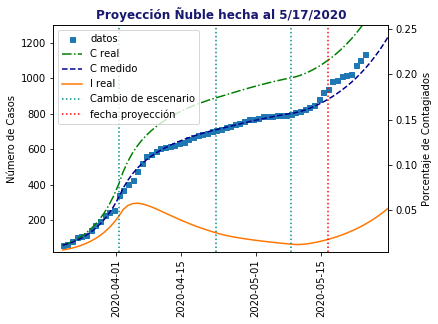

In [130]:
print (s0)
ts = np.arange (0, 100, 1)
x_plot_data = np.array([df["Fecha_dt"].iloc[0] + datetime.timedelta(days=i) for i in t_data.astype(float)])

x_plot_proy = np.array([df["Fecha_dt"].iloc[0] + datetime.timedelta(days=i) for i in np.arange(len(ts), dtype = float)])

S_c_g, E_c_g, I_c_g, R_c_g, C_c_g, C_m_g = SEIR_exams_measures_backward(ts, s0, e0, i0, r0, c0, c0, 
                                                            i_cuar3, betas_g, sigma_g, gamma_g, 
                                                            a_date_g, k_g, a_g)

plt.figure(figsize = (6, 5))
plt.subplots_adjust(bottom = 0.25)

plt.plot (x_plot_data, C_real, label = "datos", marker = "s", ls = "", markersize = 5)
plt.plot (x_plot_proy, C_c_g, label = "C real", c = "green", ls = "-.")
plt.plot (x_plot_proy, C_m_g, label = "C medido", c = "darkblue", ls = "--")
plt.plot (x_plot_proy, I_c_g, label = "I real", c = "#ff7700")
plt.axvline (x_plot_proy[i_cuar2[0]], ls = ":", label = "Cambio de escenario", c = "darkcyan")
for i in range (1, len(i_cuar2)):
    plt.axvline (x_plot_proy[i_cuar2[i]], ls = ":", c = "darkcyan")
plt.axvline (x_plot_proy[df.index[df.Fecha == fecha_proy][0]], ls = ":", c = "red", label = "fecha proyección")
plt.xlim (x_plot_proy[0] - pd.Timedelta(days=2), x_plot_proy[70])
plt.ylim (20, 1300)
plt.xticks(rotation = 90)
plt.ylabel ("Número de Casos")
plt.title ("Proyección Ñuble hecha al " + fecha_proy, c = "midnightblue", weight = "bold")
plt.legend(loc = "upper left")

ax1 = plt.gca()
ax2 = ax1.twinx ()
ax2.set_ylabel ("Porcentaje de Contagiados")
ax2.set_ylim (np.array(ax1.get_ylim())/ pop*100)

plt.savefig('Nuble_1.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


511479


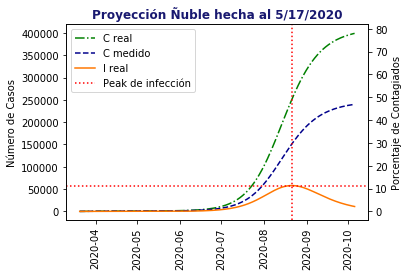

In [131]:
print (s0)
ts = np.arange (0, 200, 1)
x_plot_data = np.array([df["Fecha_dt"].iloc[0] + datetime.timedelta(days=i) for i in t_data.astype(float)])

x_plot_proy = np.array([df["Fecha_dt"].iloc[0] + datetime.timedelta(days=i) for i in np.arange(len(ts), dtype = float)])
 
S_c_g, E_c_g, I_c_g, R_c_g, C_c_g, C_m_g = SEIR_exams_measures_backward(ts, s0, e0, i0, r0, c0, c0, 
                                                            i_cuar2, betas_g, sigma_g, gamma_g, 
                                                            a_date_g, k_g, a_g)
plt.subplots_adjust(left = 0.2, bottom = 0.2)
#plt.plot (x_plot_data, C_real, label = "datos", marker = "s")
plt.plot (x_plot_proy, C_c_g, label = "C real", c = "green", ls = "-.")
plt.plot (x_plot_proy, C_m_g, label = "C medido", c = "darkblue", ls = "--")
plt.plot (x_plot_proy, I_c_g, label = "I real", c = "#ff7700")
#plt.axvline (x_plot_proy[i_cuar2[0]], ls = ":", label = "Cambio de escenario", c = "darkcyan")
#for i in range (1, len(i_cuar2)):
#    plt.axvline (x_plot_proy[i_cuar2[i]], ls = ":", c = "darkcyan")
    
plt.axvline (x_plot_proy[I_c_g.argmax()], ls = ":", c = "red", label = "Peak de infección")
plt.axhline (I_c_g.max(), ls = ":", c = "red")
#plt.xlim (x_plot_proy[0], x_plot_proy[40])
plt.xticks(rotation = 90)
plt.ylabel ("Número de Casos")
plt.title ("Proyección Ñuble hecha al " + fecha_proy, c = "midnightblue", weight = "bold")
plt.legend(loc = "upper left")

ax1 = plt.gca()
ax2 = ax1.twinx ()
ax2.set_ylabel ("Porcentaje de Contagiados")
ax2.set_ylim (np.array(ax1.get_ylim())/ pop*100)
plt.savefig('Nuble_2.eps', format='eps')

In [ ]:
print (np.sqrt(((C_real-C_m_g[:len(C_real)])**2).mean()))

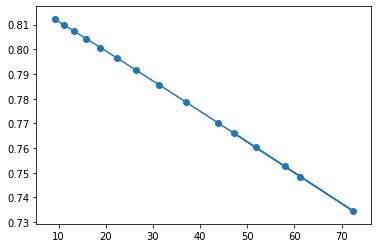

In [181]:
dC_c_g = C_c_g [1:16] - C_c_g[:15]
dC_m_g = C_m_g [1:16] - C_m_g[:15]
a__ = dC_m_g/dC_c_g
alphas = 1 + (a_g-1)/(1+np.exp(-k_g*(dC_c_g-a_date_g)))
plt.plot (dC_c_g, alphas)

plt.scatter (dC_c_g, a__)

In [182]:
print(betas_g)
betas_g2 =np.array([7.e-7, 1.e-14, 7.e-7])

[8.e-07 1.e-07 3.e-07]


In [183]:
S_c_g2, E_c_g2, I_c_g2, R_c_g2, C_c_g2, C_m_g2 = SEIR_exams_measures_backward(ts, s0, e0, i0, r0, c0, c0, 
                                                            [i_cuar, 30], betas_g2, sigma_g, gamma_g, 
                                                            a_date_g, k_g, a_g)

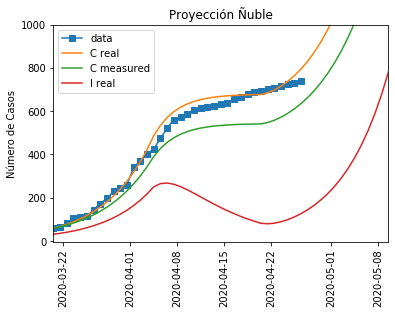

In [184]:
plt.plot (x_plot_data, C_real, label = "data", marker = "s")
plt.plot (x_plot_proy, C_c_g2, label = "C real")
plt.plot (x_plot_proy, C_m_g2, label = "C measured")
plt.plot (x_plot_proy, I_c_g2, label = "I real")
plt.plot ()
plt.xlim (x_plot_proy[0], x_plot_proy[50])
plt.ylim (-5, 1000)
plt.xticks(rotation = 90)
plt.ylabel ("Número de Casos")
plt.title ("Proyección Ñuble")
plt.legend()

# Cuarentenas alternadas

In [82]:
i_cuar3 = i_cuar2[:2]
N_cuar = 20
N_days = 14
for i in range (N_cuar):
    i_cuar3.append(i_cuar3[-1] + N_days)
betas_g3 = []
for i in range(len(i_cuar3) + 1):
    if i%2 == 0:
        betas_g3.append(betas_g[0])
    else:
        betas_g3.append(betas_g[1])
        
print (betas_g3)

[8e-07, 1e-07, 8e-07, 1e-07, 8e-07, 1e-07, 8e-07, 1e-07, 8e-07, 1e-07, 8e-07, 1e-07, 8e-07, 1e-07, 8e-07, 1e-07, 8e-07, 1e-07, 8e-07, 1e-07, 8e-07, 1e-07, 8e-07]


In [83]:
print (i_cuar3)

[12, 33, 47, 61, 75, 89, 103, 117, 131, 145, 159, 173, 187, 201, 215, 229, 243, 257, 271, 285, 299, 313]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


50085.84796046654 9.790978408891105


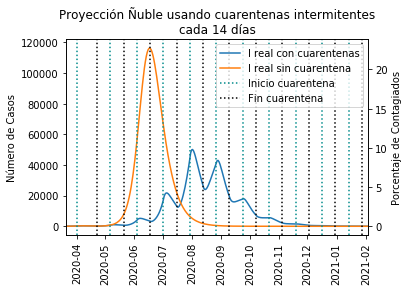

In [84]:
ts = np.arange (0, 1000, 1)
x_plot_proy = np.array([df["Fecha_dt"].iloc[0] + datetime.timedelta(days=i) for i in np.arange(len(ts), dtype = float)])

S_c_g, E_c_g, I_c_g, R_c_g, C_c_g, C_m_g = SEIR_exams_measures_backward(ts, s0, e0, i0, r0, c0, c0, 
                                                            i_cuar3, betas_g3, sigma_g, gamma_g, 
                                                            a_date_g, k_g, a_g)
S_c_g_nc, E_c_g_nc, I_c_g_nc, R_c_g_nc, C_c_g_nc, C_m_g_nc = SEIR_exams_measures_backward(ts, s0, e0, i0, r0, c0, c0, 
                                                            i_cuar3[:2], betas_g3[:3], sigma_g, gamma_g, 
                                                            a_date_g, k_g, a_g)

plt.subplots_adjust(left = 0.2, bottom = 0.2)
#plt.figure(figsize = (7, 7))
#plt.plot (x_plot_proy, C_c_g, label = "C real con cuarentenas")
#plt.plot (x_plot_proy, C_m_g, label = "C medido con cuarentenas")
plt.plot (x_plot_proy, I_c_g, label = "I real con cuarentenas")
#plt.plot (x_plot_proy, C_c_g_nc, label = "C real sin cuarentenas")
#plt.plot (x_plot_proy, C_m_g_nc, label = "C medido sin cuarentenas")
plt.plot (x_plot_proy, I_c_g_nc, label = "I real sin cuarentena")
#plt.ylim (-10, 360000)
plt.xlim (x_plot_proy[0], x_plot_proy[320])
plt.xticks(rotation = 90)
plt.axvline (x_plot_proy[i_cuar3[0]], ls = ":", label = "Inicio cuarentena", c = "darkcyan")
plt.axvline (x_plot_proy[i_cuar3[1]], ls = ":", label = "Fin cuarentena", c = "k")
for i in range (2, len(i_cuar3)):
    if (i % 2 == 0):
        plt.axvline (x_plot_proy[i_cuar3[i]], ls = ":", c = "darkcyan")
    else: 
        plt.axvline (x_plot_proy[i_cuar3[i]], ls = ":", c = "k")

plt.ylabel ("Número de Casos")
plt.title ("Proyección Ñuble usando cuarentenas intermitentes\ncada " + str(N_days) + " días")
plt.legend()

ax1 = plt.gca()
ax2 = ax1.twinx ()
ax2.set_ylabel ("Porcentaje de Contagiados")
ax2.set_ylim (np.array(ax1.get_ylim())/ pop*100)

print (I_c_g.max(), I_c_g.max()*100/pop)

plt.savefig('Nuble_cuarprog.eps', format='eps')